In [6]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# PROBLEM STAMT1:PREDICTING MINIMUM TEMPERATURE

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [8]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [9]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [10]:
df.sample(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
586      12.0  23-07-2013          25.6          23.7    59.937866   
3407      8.0  12-07-2015          27.0          23.4    83.982643   
4248     24.0  14-08-2015          31.3          24.1    50.365265   
22       23.0  30-06-2013          32.7          24.4    54.705585   
2128      4.0  23-07-2014          25.8          22.8    56.387859   
6397     23.0  07-07-2017          29.2          25.4    84.657143   
2480      6.0  06-08-2014          26.9          23.1    47.077930   
2474     25.0  05-08-2014          29.7          25.2    66.195442   
7697     23.0  28-08-2017          27.2          18.3    32.857208   
221      22.0  08-07-2013          26.7          23.8    76.100571   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
586     95.883232         27.476720         23.155112  13.144148   40.700773   
3407    93.800346         24.443484         22.371119  13.850919   71.990403   
4248    79.006760         31.348556         25.430221   6.122525   50.987401   
22      75.919823         28.857981         24.733711   6.019616   90.838489   
2128    98.698311         29.144539         21.975719   4.727321   86.684498   
6397    93.430618         27.433449         25.217150   9.989136   56.315415   
2480    95.008842         29.510238         22.595924   4.997554   54.472962   
2474    87.649048         27.428306         24.367549   4.570697   27.635192   
7697    91.985222         22.880709         16.750498  10.348089  105.022193   
221     92.509483         28.184879         24.291736   7.618094   42.395685   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
586   ...    0.065637    0.000000    0.000000  37.5507  126.988  132.1180   
3407  ...    0.349322    0.075367    1.218704  37.4697  126.910   52.5180   
4248  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
22    ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
2128  ...    0.045392    0.011379    0.012089  37.6450  127.022   45.7160   
6397  ...    2.332127    0.000000    0.000000  37.5372  126.891   15.5876   
2480  ...    0.256186    0.000000    0.049174  37.5102  127.042   54.6384   
2474  ...    0.003030    0.200455    0.009087  37.5237  126.970   19.5844   
7697  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
221   ...    0.000000    0.002630    0.000000  37.5102  127.086   21.9668   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
586   0.5931      5648.383301       29.6       21.4  
3407  1.5629      5759.000000       24.8       20.8  
4248  0.2223      5016.055176       31.5       25.4  
22    0.1554      5851.387695       31.8       23.2  
2128  2.5348      5583.532715       25.0       18.7  
6397  0.1554      5801.465820       28.2       24.5  
2480  0.1457      5275.238281       27.8       23.1  
2474  0.2713      5288.856445       27.3       22.8  
7697  0.1554      4522.184570       24.7       17.9  
221   0.1332      5793.305176       28.2       24.0  

[10 rows x 25 columns]

In [11]:
df.shape

(7752, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


From above  we notice that there are all are float columns except 1 is only object column..
Also,there are few missisng values in the dataset.

In [13]:
df.Next_Tmax.unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

We observe that max values lies between range 17 to 38

In [14]:
df.Next_Tmin.unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
        nan, 26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3,
       27.6, 28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9,
       17.5, 16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1,
       28.5, 28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9,
       17.7, 17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3,
       15.4, 15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1,
       15. , 11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16

we notice that min temperature lies between 11 to 30

In [15]:
df.Next_Tmax.value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64

From above we observe that, there are unique values for ,aximum temperature,also the values are continous

Hence,the problem is solved as REGRESSION PROBLEM

In [16]:
df.Next_Tmin.value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

From above we observe that, there are unique values for ,Minimum temperature,also the values are continous

Hence,the problem is solved as REGRESSION PROBLEM

In [17]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

As we observe that few columns have 75 misising rows
while other two columns Tmin and Tmax have 27 columns
lets drop null valyues from Tmax and Tmin as there are considerably less compared to dataset records which are 7750

In [18]:
df.dropna(subset=['Next_Tmax','Next_Tmin','station','Date'],inplace=True)

In [19]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

In [20]:
#CONVERTING DATE COLUMN TO DATETIME DATATYPE AS IT IS OF FLOAT TYPE
df['Date']=pd.to_datetime(df['Date'])

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
num=['Present_Tmax','Present_Tmin' ,       
'LDAPS_RHmin' ,       
'LDAPS_RHmax',         
'LDAPS_Tmax_lapse' ,   
'LDAPS_Tmin_lapse' ,   
'LDAPS_WS' ,           
'LDAPS_LH'  ,          
'LDAPS_CC1'  ,         
'LDAPS_CC2'   ,        
'LDAPS_CC3'    ,       
'LDAPS_CC4'     ,      
'LDAPS_PPT1'     ,     
'LDAPS_PPT2'      ,    
'LDAPS_PPT3'       ,   
'LDAPS_PPT4' ]
imputer=SimpleImputer()
df[num]=imputer.fit_transform(df[num])


In [22]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7723 non-null   float64       
 1   Date              7723 non-null   datetime64[ns]
 2   Present_Tmax      7723 non-null   float64       
 3   Present_Tmin      7723 non-null   float64       
 4   LDAPS_RHmin       7723 non-null   float64       
 5   LDAPS_RHmax       7723 non-null   float64       
 6   LDAPS_Tmax_lapse  7723 non-null   float64       
 7   LDAPS_Tmin_lapse  7723 non-null   float64       
 8   LDAPS_WS          7723 non-null   float64       
 9   LDAPS_LH          7723 non-null   float64       
 10  LDAPS_CC1         7723 non-null   float64       
 11  LDAPS_CC2         7723 non-null   float64       
 12  LDAPS_CC3         7723 non-null   float64       
 13  LDAPS_CC4         7723 non-null   float64       
 14  LDAPS_PPT1        7723 n

#Successfully handled null values

In [24]:
df.nunique()

station               25
Date                 310
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7646
LDAPS_RHmax         7638
LDAPS_Tmax_lapse    7649
LDAPS_Tmin_lapse    7649
LDAPS_WS            7649
LDAPS_LH            7649
LDAPS_CC1           7544
LDAPS_CC2           7556
LDAPS_CC3           7573
LDAPS_CC4           7498
LDAPS_PPT1          2799
LDAPS_PPT2          2499
LDAPS_PPT3          2346
LDAPS_PPT4          1913
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [25]:
df.duplicated().sum()

0

#no duplicate values in dataset

EDA --UNIVARIATE ANALYSIS

<Axes: xlabel='lat', ylabel='Density'>

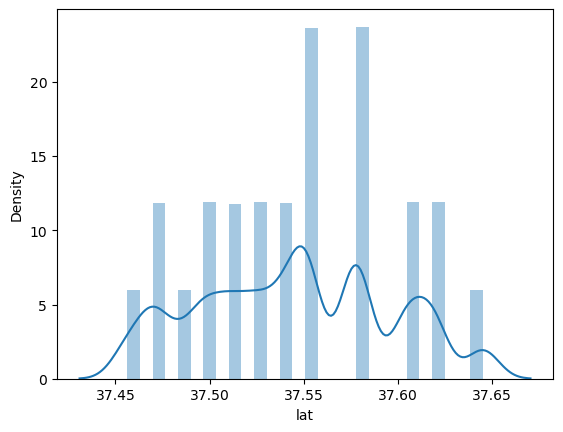

In [26]:
sns.distplot(df['lat'])

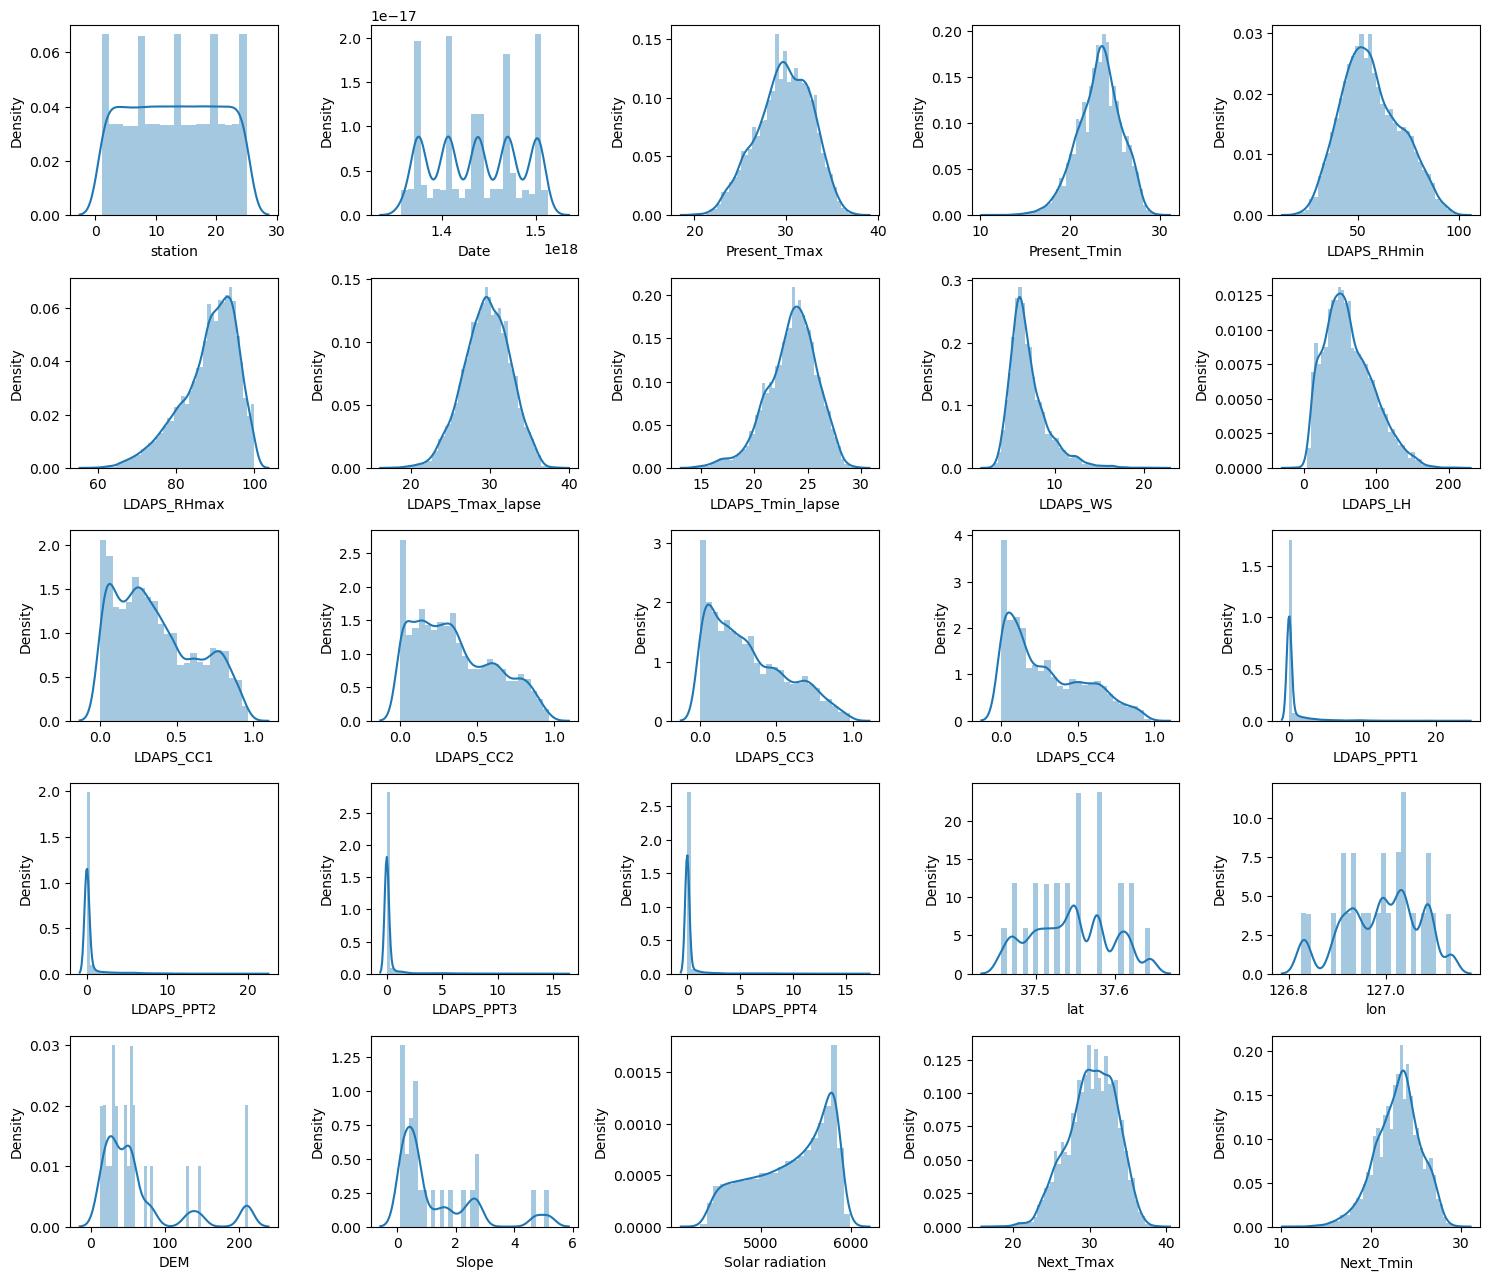

In [27]:
plt.figure(figsize=(15,15))
p=1
for i in df:
     if p<=26:
            plt.subplot(6,5,p)
            sns.distplot(df[i])
            plt.xlabel(i)
     p+=1
plt.tight_layout()

From above graph we observe that
Preent Tmax and Tmin are slightly left skewed
solar Radiation ,Next Tmax and Tmin are slightly left skewed
RHmax,Tmax and Tmin lapse are also slightly left skewed
Percipitaion 1,2,3,4 are right skewed
while other features are asymmetrical skewed

<Axes: xlabel='Next_Tmax', ylabel='Count'>

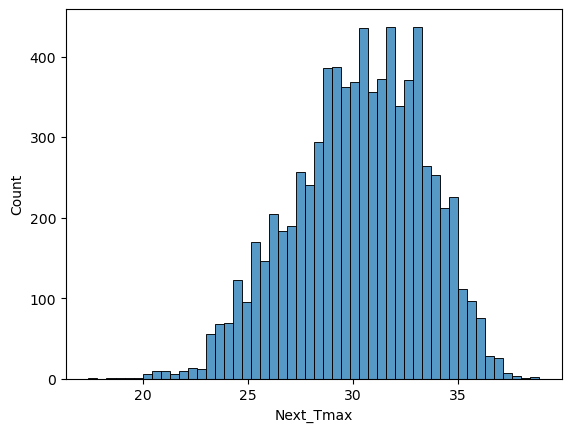

In [28]:
sns.histplot(x='Next_Tmax',bins=50,data=df)

We observe that maximum temperature for Next day lies between 30 to 35

<Axes: xlabel='Next_Tmin', ylabel='Count'>

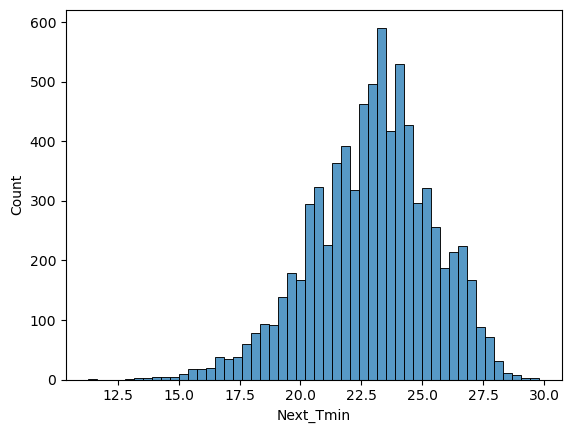

In [29]:
sns.histplot(x='Next_Tmin',bins=50,data=df)

We observe that min temp for next day is between 22.5 to 25

<Axes: xlabel='Present_Tmax', ylabel='Count'>

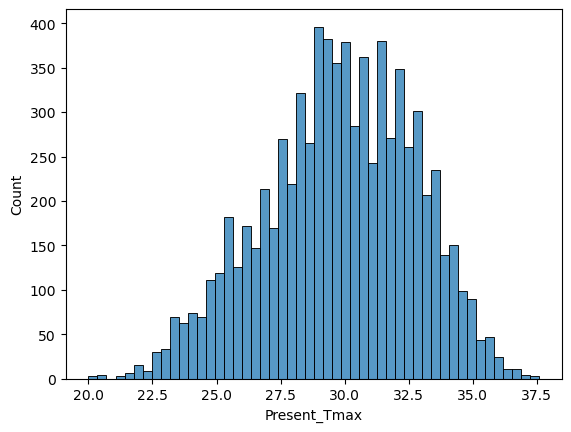

In [30]:
sns.histplot(x='Present_Tmax',bins=50,data=df)

We observe that maximum temp fr present day lies between 27.5 to 32.5

<Axes: xlabel='Present_Tmin', ylabel='Count'>

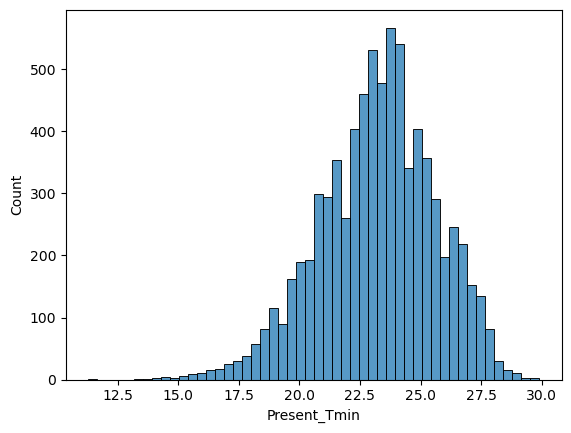

In [31]:
sns.histplot(x='Present_Tmin',bins=50,data=df)

We observe that min temp for Present day lies between 22.5 to 25

BIVARIAE ANALYSIS

<Axes: xlabel='lat', ylabel='Next_Tmax'>

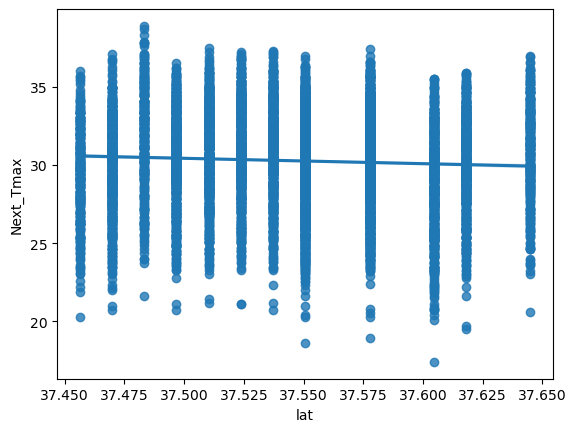

In [32]:
sns.regplot(x='lat',y='Next_Tmax',data=df)

We observe that as latitude increases there is slight decrease in Nextday Max temp
both are not correlated to each other

In [33]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

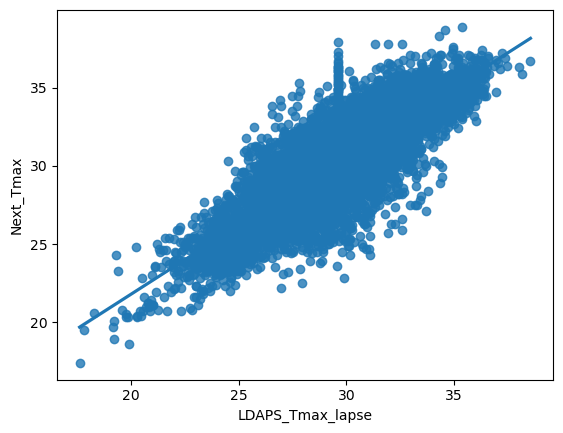

In [34]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

We see highly positive correlation of Tmax Lapse with Next Tmax ,ie as there is change of height in atmosphere Tmax also incraeses 

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

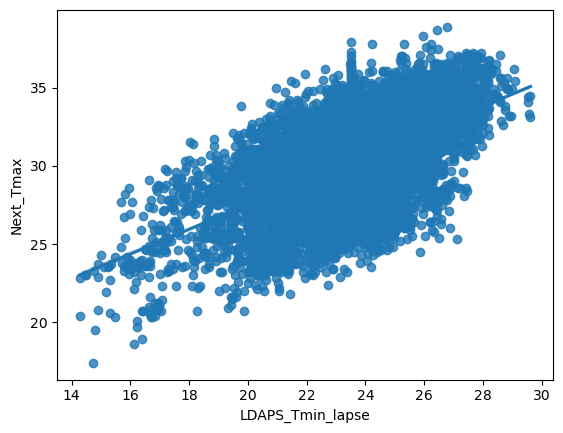

In [35]:
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

We see highly positive correlation of Tmin Lapse with Next Tmax ,ie as there is change of height in atmosphere Tmax also increases

<Axes: xlabel='LDAPS_LH', ylabel='Next_Tmax'>

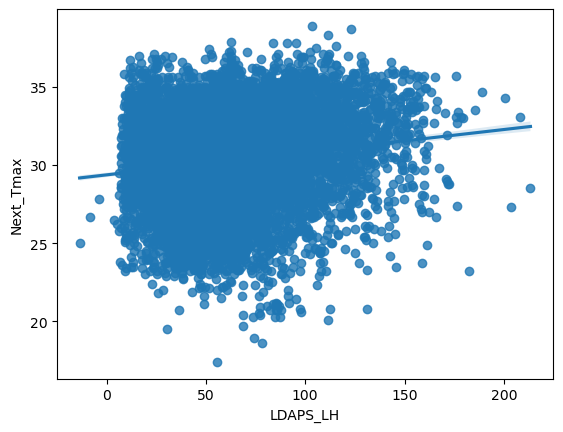

In [36]:
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df)

We observe slight positive correlation of next Tmax with latent heat flux

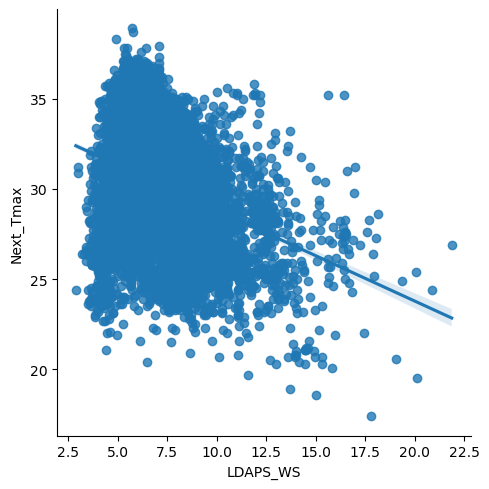

In [37]:
sns.lmplot(x='LDAPS_WS',y='Next_Tmax',data=df)

We observe that highly negative correlation between Wind speed and Next Tmax,As wind Speed incraeses then Maximum temperature decreases which is logical

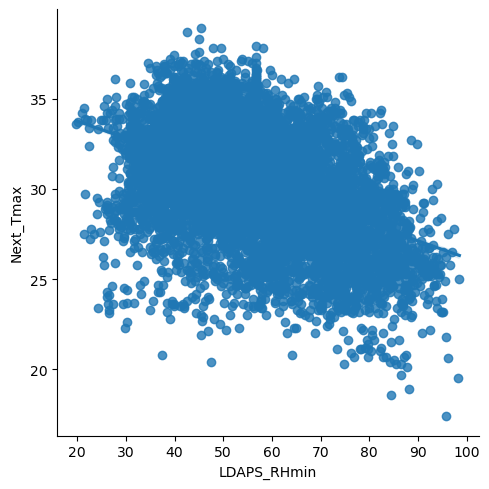

In [38]:
sns.lmplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

We observe Negative correlation between Minimum humidty and Nextday Tmax,which is obn=vious as humid the climate the temperature drops

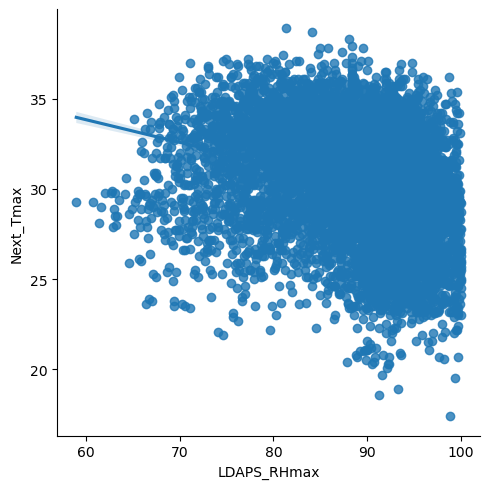

In [39]:
sns.lmplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

We observe No correlation between Maximum humidty and Nextday Tmax

<Axes: xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

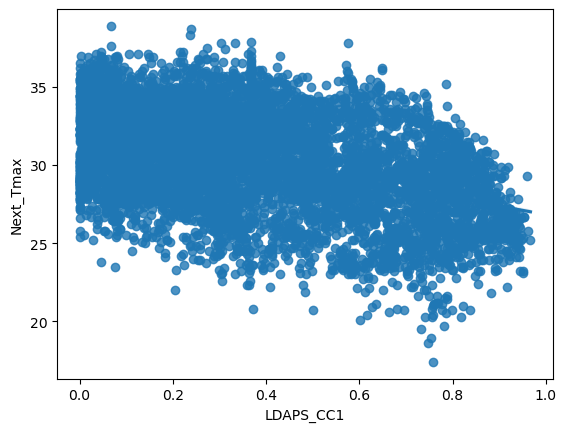

In [40]:
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

We observe not much correlation between cloud coverage(1st 6hours) with Next Tmax

<Axes: xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

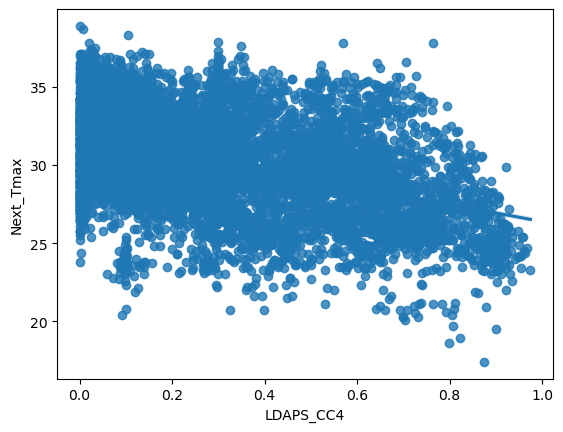

In [41]:
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df)

We observe slight negative  correlation between cloud coverage(18-23h) and NxtTmax

<Axes: xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

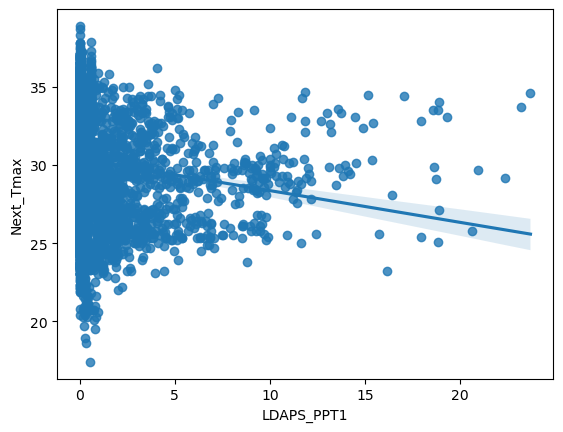

In [42]:
sns.regplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

We observe that percipitation with Next Tmax are less correlated to each other

array([[<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='Next_Tmax', ylabel='LDAPS_PPT1'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='Next_Tmax', ylabel='LDAPS_PPT2'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='Next_Tmax', ylabel='LDAPS_PPT3'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT4'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT4'>,
        <Axes:

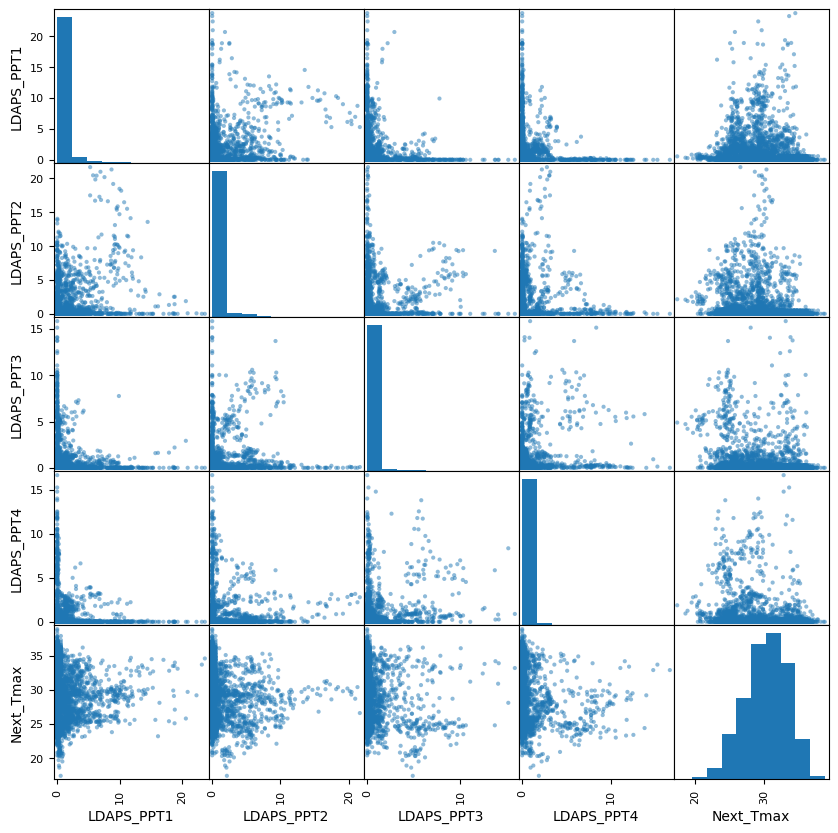

In [43]:
attr=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax']
pd.plotting.scatter_matrix(df[attr],figsize=(10,10))

We observe that as perciitation increases the Tmax also increases.
These features are less correalted with target variable NextTmax

# BIVARATE ANALYSIS WITH NEXT TMax

<Axes: xlabel='lat', ylabel='Next_Tmin'>

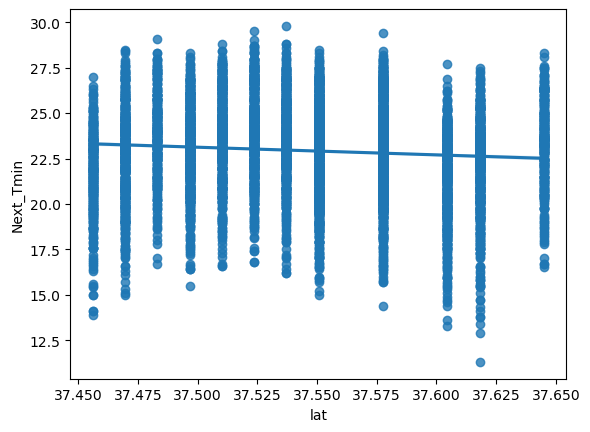

In [44]:
sns.regplot(x='lat',y='Next_Tmin',data=df)

We observe that as latitude increases there is slight decrease in Nextday Min temp
both are not correlated to each other

In [45]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

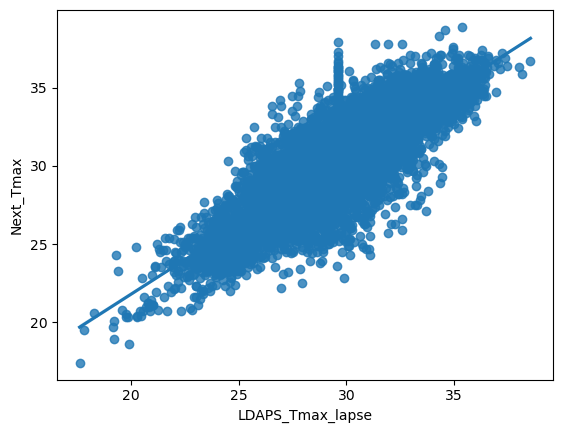

In [46]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

We see highly positive correlation of Tmax Lapse with Next Tmax ,ie as there is change of height in atmosphere Tmax also incraeses 

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

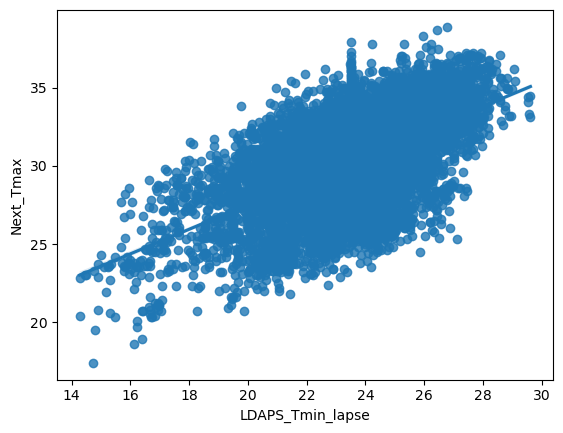

In [47]:
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

We see highly positive correlation of Tmin Lapse with Next Tmax ,ie as there is change of height in atmosphere Tmax also increases

<Axes: xlabel='LDAPS_LH', ylabel='Next_Tmax'>

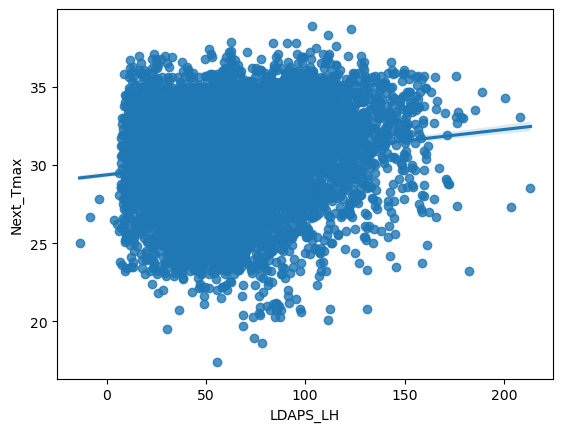

In [48]:
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df)

We observe slight positive correlation of next Tmax with latent heat flux

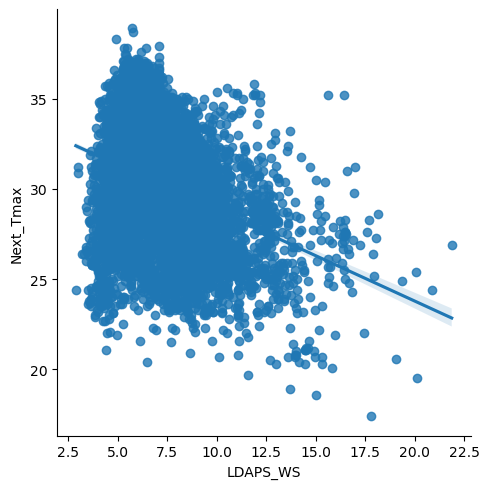

In [49]:
sns.lmplot(x='LDAPS_WS',y='Next_Tmax',data=df)

We observe that highly negative correlation between Wind speed and Next Tmax,As wind Speed incraeses then Maximum temperature decreases which is logical

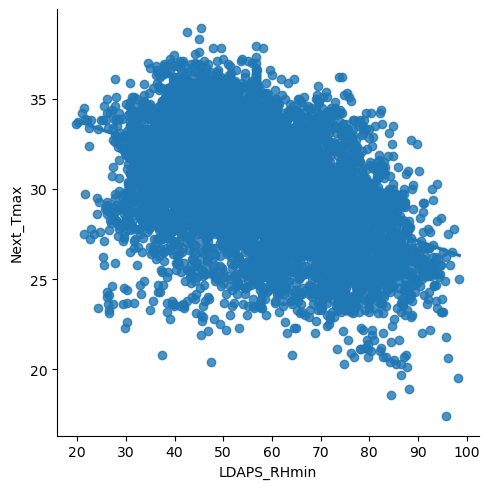

In [50]:
sns.lmplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

We observe Negative correlation between Minimum humidty and Nextday Tmax,which is obn=vious as humid the climate the temperature drops

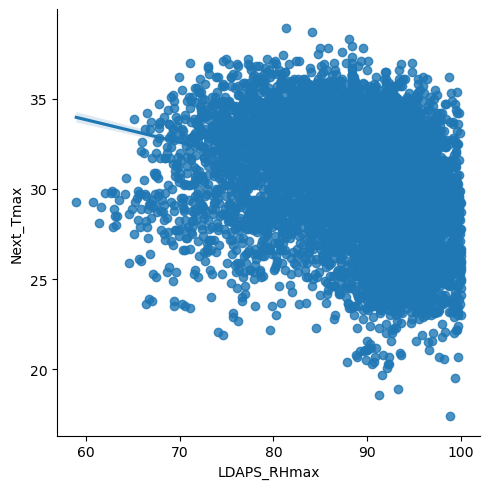

In [51]:
sns.lmplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

We observe No correlation between Maximum humidty and Nextday Tmax

<Axes: xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

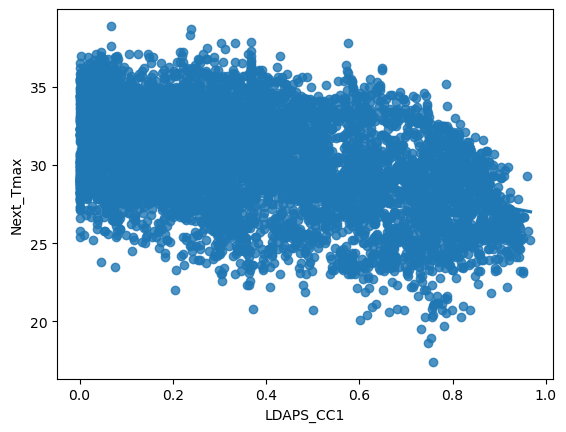

In [52]:
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

We observe not much correlation between cloud coverage(1st 6hours) with Next Tmax

<Axes: xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

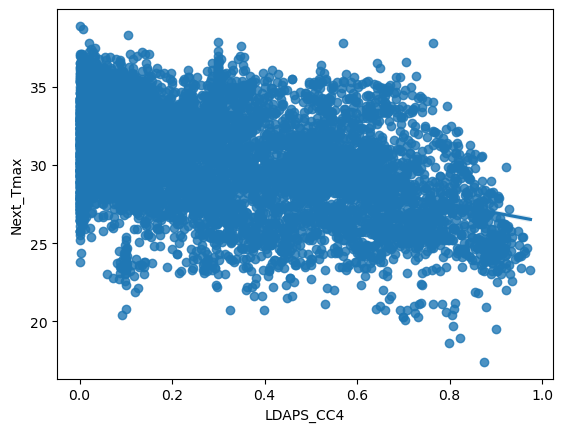

In [53]:
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df)

We observe slight negative  correlation between cloud coverage(18-23h) and NxtTmax

<Axes: xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

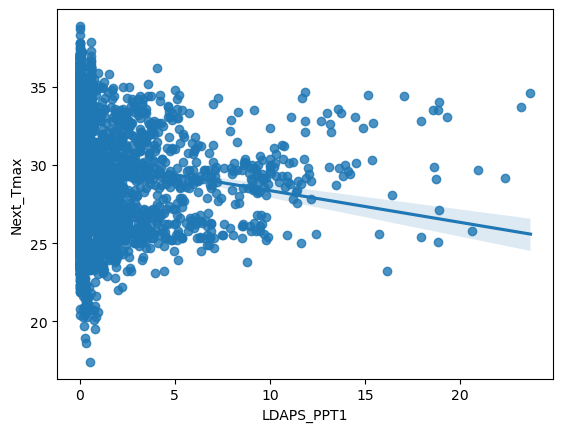

In [54]:
sns.regplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

We observe that percipitation with Next Tmax are less correlated to each other

array([[<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='Next_Tmax', ylabel='LDAPS_PPT1'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='Next_Tmax', ylabel='LDAPS_PPT2'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='Next_Tmax', ylabel='LDAPS_PPT3'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT4'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT4'>,
        <Axes:

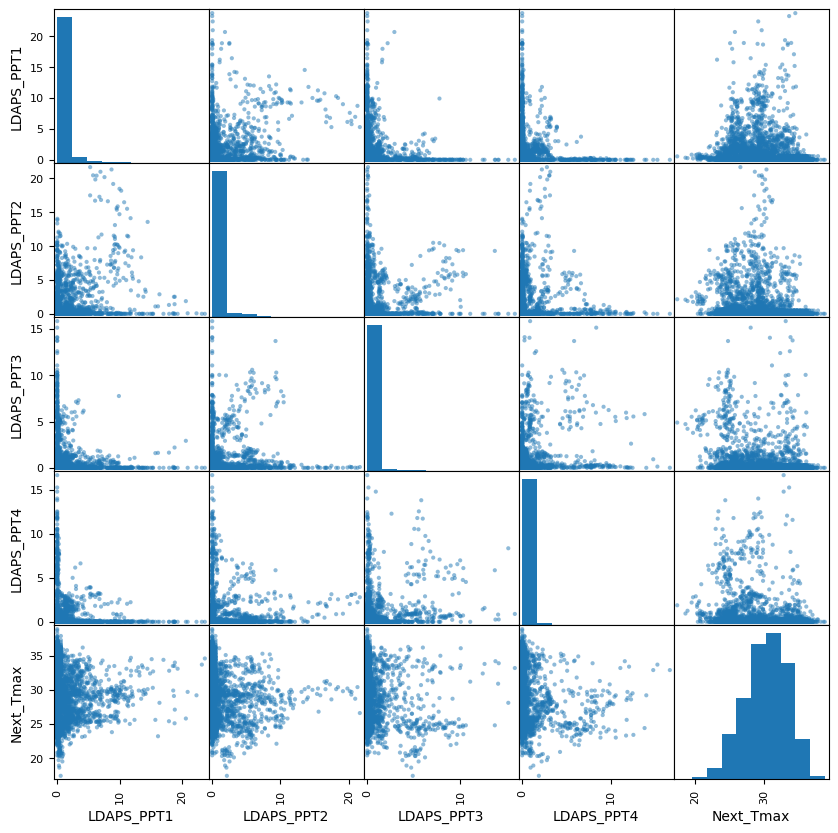

In [55]:
attr=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax']
pd.plotting.scatter_matrix(df[attr],figsize=(10,10))

We observe that as perciitation increases the Tmax also increases.
These features are less correalted with target variable NextTmax

# BIVARIATE ANALYSIS FOR NEXT Tmin

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

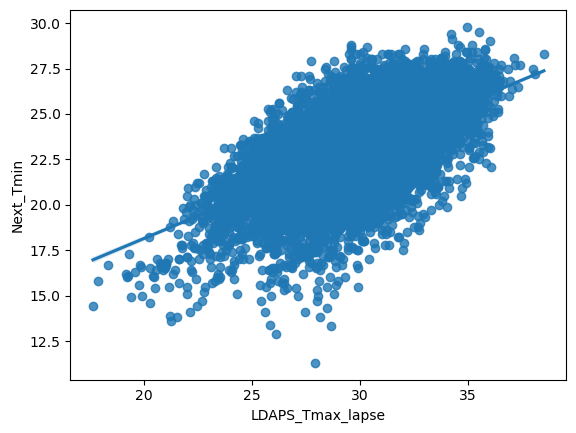

In [56]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df)

We see highly positive correlation of Tmax Lapse with Next Tmin ,ie as there is change of height in atmosphere Tmin also incraeses 

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

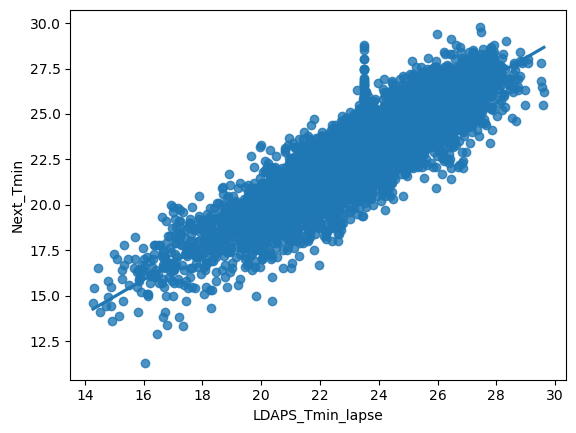

In [57]:
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

We see highly positive correlation of Tmin Lapse with Next Tmax ,ie as there is change of height in atmosphere Tmax also increases

<Axes: xlabel='LDAPS_LH', ylabel='Next_Tmax'>

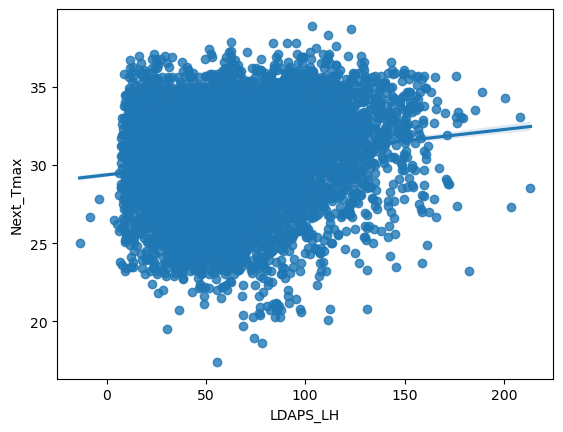

In [110]:
sns.regplot(x='LDAPS_LH',y='Next_Tmin',data=df)

We observe slight positive correlation of next Tmin with latent heat flux

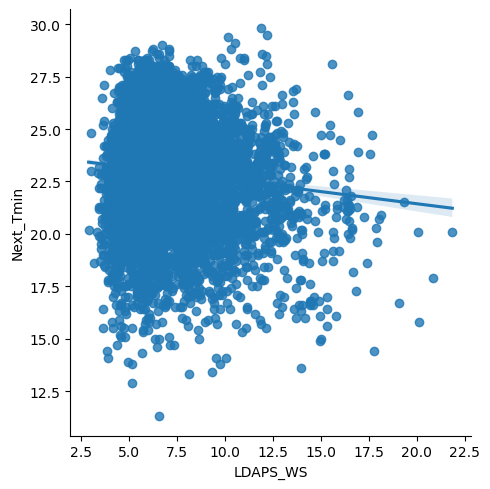

In [58]:
sns.lmplot(x='LDAPS_WS',y='Next_Tmin',data=df)

We observe that highly negative correlation between Wind speed and Next Tmin,As wind Speed incraeses then Maximum temperature decreases which is logical

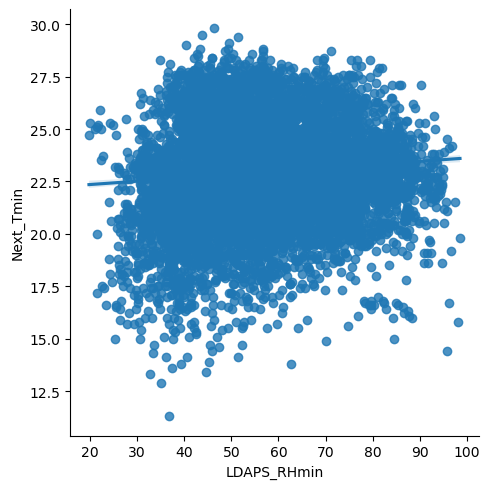

In [59]:
sns.lmplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)

We observe slight positive correlation between Minimum humidty and Nextday Tmin

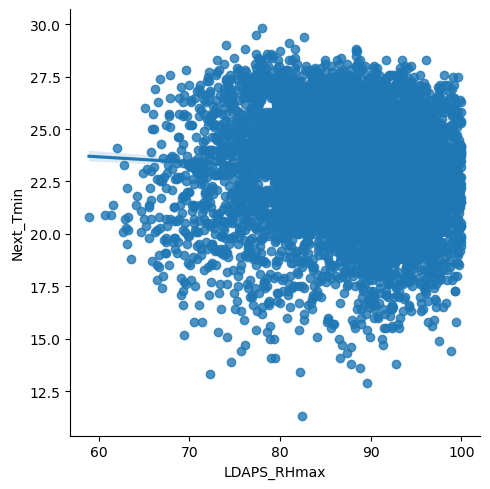

In [60]:
sns.lmplot(x='LDAPS_RHmax',y='Next_Tmin',data=df)

We observe No correlation between Maximum humidty and Nextday Tmin

<Axes: xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

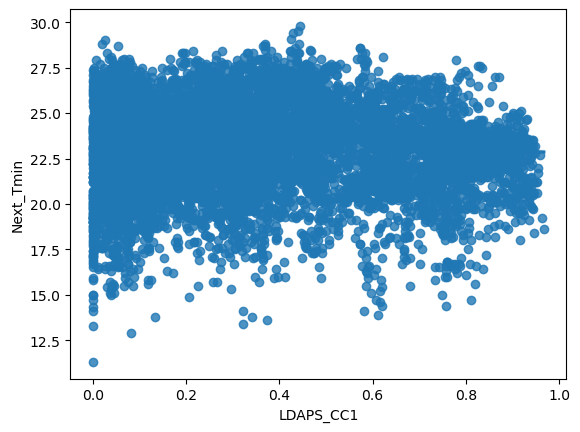

In [61]:
sns.regplot(x='LDAPS_CC1',y='Next_Tmin',data=df)

We observe not much correlation between cloud coverage(1st 6hours) with Next Tmin

<Axes: xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

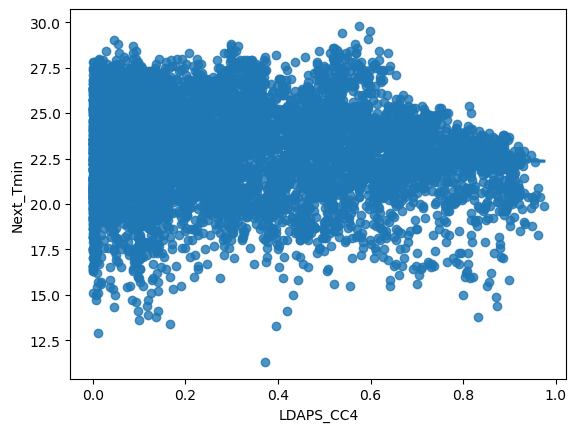

In [62]:
sns.regplot(x='LDAPS_CC4',y='Next_Tmin',data=df)

We observe slight negative  correlation between cloud coverage(18-23h) and NxtTmin

<Axes: xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

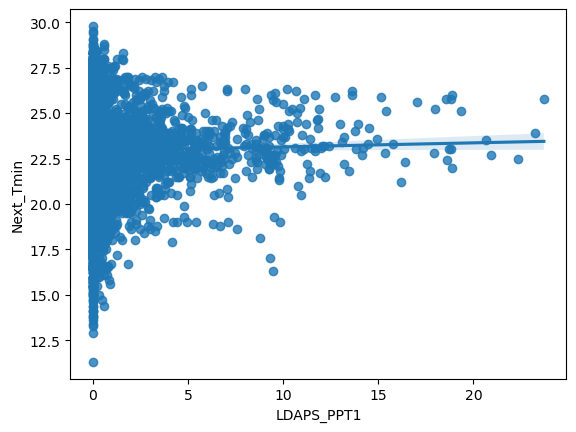

In [63]:
sns.regplot(x='LDAPS_PPT1',y='Next_Tmin',data=df)

We observe that percipitation with Next Tmin are less correlated to each other

array([[<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT1'>,
        <Axes: xlabel='Next_Tmin', ylabel='LDAPS_PPT1'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT2'>,
        <Axes: xlabel='Next_Tmin', ylabel='LDAPS_PPT2'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_PPT3'>,
        <Axes: xlabel='Next_Tmin', ylabel='LDAPS_PPT3'>],
       [<Axes: xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT4'>,
        <Axes: xlabel='LDAPS_PPT2', ylabel='LDAPS_PPT4'>,
        <Axes:

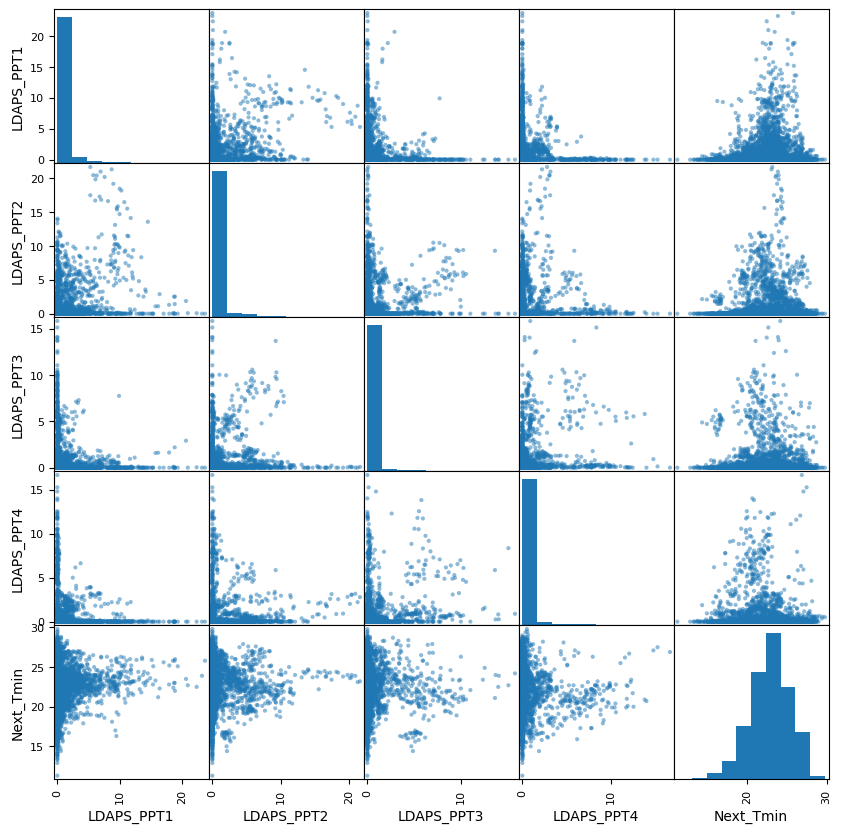

In [64]:
attr=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmin']
pd.plotting.scatter_matrix(df[attr],figsize=(10,10))

We observe that as perciitation increases the Tmin also increases.
These features are less correalted with target variable NextTmin

CHECKING OUTLIERS

In [118]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [160]:
from scipy.stats import zscore
out=df.drop(['Date','Next_Tmax', 'Next_Tmin'],axis=1)
z=np.abs(zscore(out))
z

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0     1.664663      0.361918      0.760331     0.103970     0.383610   
1     1.526035      0.720639      0.677022     0.307285     0.312106   
2     1.387408      0.619149      0.031109     0.552496     0.614621   
3     1.248780      0.754469      0.072764     0.102879     1.133715   
4     1.110152      0.551490      0.552057     0.038891     0.249274   
...        ...           ...           ...          ...          ...   
7745  1.107891      2.256392      2.259903     2.199733     1.412924   
7746  1.246518      2.459371      2.426522     1.828725     0.654251   
7747  1.385146      2.188732      2.551486     2.058881     1.327887   
7748  1.523774      2.188732      2.301557     2.244230     1.547983   
7749  1.662401      2.222562      2.426522     2.320247     1.555143   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0             0.526914          0.216790  0.127705  0.208725   0.515449  ...   
1             0.079943          0.224304  0.648272  0.314039   0.547790  ...   
2             0.162129          0.451968  0.442107  1.250196   0.609736  ...   
3             0.030051          0.079820  0.667598  0.097552   0.582802  ...   
4             0.171722          0.011042  0.628357  1.358274   0.831762  ...   
...                ...               ...       ...       ...        ...  ...   
7745          0.616206          2.235006  0.227307  1.577297   1.209253  ...   
7746          0.994612          2.444801  0.613078  0.587640   1.157292  ...   
7747          1.115131          2.032209  0.437168  0.286523   1.296888  ...   
7748          0.890330          2.050298  0.255222  0.454204   1.274509  ...   
7749          0.572886          2.140636  0.089565  1.592939   1.224385  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0      0.664909    0.306878    0.277399    0.241582    0.225506  1.188219   
1      0.677569    0.306878    0.277399    0.241582    0.225506  1.188219   
2      0.620624    0.306878    0.277399    0.241582    0.225506  0.652150   
3      0.651776    0.306878    0.277399    0.241582    0.225506  1.990336   
4      0.510293    0.306878    0.277399    0.241582    0.225506  0.118067   
...         ...         ...         ...         ...         ...       ...   
7745   1.165419    0.306878    0.277399    0.241582    0.225506  0.118067   
7746   1.112825    0.306878    0.277399    0.241582    0.225506  0.686036   
7747   1.182742    0.306878    0.277399    0.241582    0.225506  0.149967   
7748   1.182742    0.306878    0.277399    0.241582    0.225506  0.418002   
7749   1.179593    0.306878    0.277399    0.241582    0.225506  0.418002   

           lon       DEM     Slope  Solar radiation  
0     0.004705  2.769916  1.113817         1.516820  
1     0.512235  0.315833  0.543011         1.228776  
2     0.840050  0.526781  0.723950         1.215358  
3     0.386152  0.298273  0.931274         1.199997  
4     1.810888  0.494902  0.549286         1.206027  
...        ...       ...       ...              ...  
7745  0.613101  0.655844  0.500695         2.065260  
7746  1.193082  0.735600  0.820913         2.098405  
7747  1.265534  0.853069  0.804716         2.094885  
7748  1.038585  0.821617  0.755906         2.106400  
7749  0.269479  0.779470  0.720156         2.076166  

[7723 rows x 22 columns]

In [161]:
np.where(z>3)

(array([  25,   25,   26, ..., 7716, 7717, 7717], dtype=int64),
 array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))

In [162]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(6875, 25)

In [163]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6875 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           6875 non-null   float64       
 1   Date              6875 non-null   datetime64[ns]
 2   Present_Tmax      6875 non-null   float64       
 3   Present_Tmin      6875 non-null   float64       
 4   LDAPS_RHmin       6875 non-null   float64       
 5   LDAPS_RHmax       6875 non-null   float64       
 6   LDAPS_Tmax_lapse  6875 non-null   float64       
 7   LDAPS_Tmin_lapse  6875 non-null   float64       
 8   LDAPS_WS          6875 non-null   float64       
 9   LDAPS_LH          6875 non-null   float64       
 10  LDAPS_CC1         6875 non-null   float64       
 11  LDAPS_CC2         6875 non-null   float64       
 12  LDAPS_CC3         6875 non-null   float64       
 13  LDAPS_CC4         6875 non-null   float64       
 14  LDAPS_PPT1        6875 n

Hence,Outliers are succesfully removed

In [164]:
df=df_new

In [165]:
df.shape

(6875, 25)

CHECKING SKEWNESS IN FEATURES

<Axes: xlabel='lat', ylabel='Next_Tmax'>

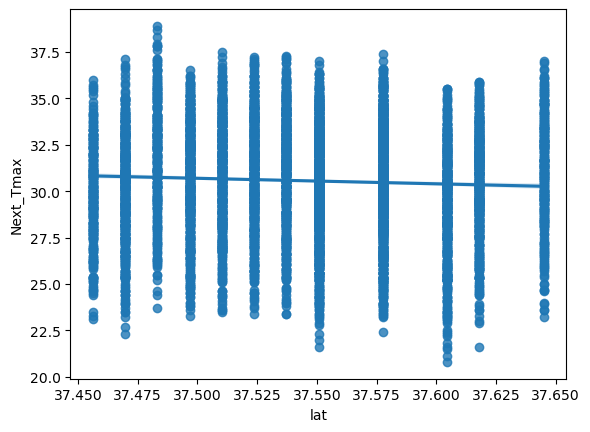

In [166]:
sns.regplot(x='lat',y='Next_Tmax',data=df)

We observe that as latitude increases there is slight decrease in Nextday Max temp
both are not correlated to each other

In [167]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

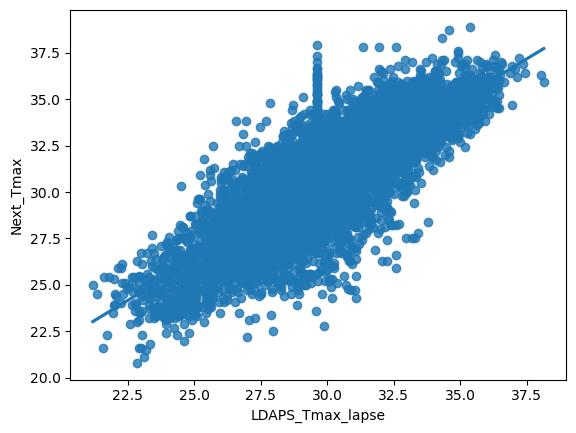

In [168]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

We see highly positive correlation of Tmax Lapse with Next Tmax ,ie as there is change of height in atmosphere Tmax also incraeses 

We observe that as perciitation increases the Tmax also increases.
These features are less correalted with target variable NextTmax

In [169]:
df.skew()

station            -0.001689
Present_Tmax       -0.276649
Present_Tmin       -0.231363
LDAPS_RHmin         0.307894
LDAPS_RHmax        -0.683973
LDAPS_Tmax_lapse   -0.106693
LDAPS_Tmin_lapse   -0.394388
LDAPS_WS            1.087404
LDAPS_LH            0.564865
LDAPS_CC1           0.597099
LDAPS_CC2           0.505190
LDAPS_CC3           0.703603
LDAPS_CC4           0.711948
LDAPS_PPT1          3.728948
LDAPS_PPT2          4.863219
LDAPS_PPT3          5.513243
LDAPS_PPT4          5.920543
lat                 0.104960
lon                -0.277149
DEM                 1.759335
Slope               1.590726
Solar radiation    -0.505979
Next_Tmax          -0.269357
Next_Tmin          -0.294408
dtype: float64

In [170]:
from scipy.stats import boxcox
attr=['LDAPS_RHmax', 'LDAPS_WS',
      
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
       'DEM', 'Slope']

df[attr]=boxcox(df[attr],0.5)

df.skew()

station            -0.001689
Present_Tmax       -0.276649
Present_Tmin       -0.231363
LDAPS_RHmin         0.307894
LDAPS_RHmax        -0.774710
LDAPS_Tmax_lapse   -0.106693
LDAPS_Tmin_lapse   -0.394388
LDAPS_WS            0.734057
LDAPS_LH            0.564865
LDAPS_CC1           0.597099
LDAPS_CC2           0.505190
LDAPS_CC3           0.703603
LDAPS_CC4           0.711948
LDAPS_PPT1          2.402112
LDAPS_PPT2          3.037397
LDAPS_PPT3          3.263436
LDAPS_PPT4          3.588147
lat                 0.104960
lon                -0.277149
DEM                 1.171165
Slope               0.881935
Solar radiation    -0.505979
Next_Tmax          -0.269357
Next_Tmin          -0.294408
dtype: float64

Skewness is handled successfully

CHECKING CORRELATION

In [176]:
corr=df.corr()
corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110562      0.133293    -0.068015   
Present_Tmax      0.110562      1.000000      0.614567    -0.149202   
Present_Tmin      0.133293      0.614567      1.000000     0.152737   
LDAPS_RHmin      -0.068015     -0.149202      0.152737     1.000000   
LDAPS_RHmax      -0.170743     -0.286927     -0.032394     0.550270   
LDAPS_Tmax_lapse  0.066322      0.535967      0.436781    -0.552030   
LDAPS_Tmin_lapse  0.103681      0.611659      0.755266     0.134890   
LDAPS_WS          0.022828     -0.095833      0.023128     0.220568   
LDAPS_LH         -0.134194      0.127384     -0.007516    -0.038547   
LDAPS_CC1         0.008961     -0.284092      0.092308     0.575475   
LDAPS_CC2         0.006426     -0.152291      0.120498     0.714371   
LDAPS_CC3         0.007741     -0.057694      0.043671     0.655469   
LDAPS_CC4         0.011175     -0.047680     -0.004538     0.457905   
LDAPS_PPT1       -0.001902     -0.156418      0.093470     0.370626   
LDAPS_PPT2       -0.016299     -0.054470      0.114401     0.472588   
LDAPS_PPT3       -0.001416     -0.010664      0.055699     0.354046   
LDAPS_PPT4        0.008570     -0.025149     -0.042746     0.230565   
lat              -0.240252     -0.051841     -0.072766     0.088984   
lon              -0.122059      0.010713     -0.044728    -0.095571   
DEM              -0.283173     -0.159254     -0.247281     0.085477   
Slope            -0.124401     -0.095522     -0.153240     0.102349   
Solar radiation  -0.029844     -0.061377      0.015200     0.251779   
Next_Tmax         0.107297      0.587399      0.449434    -0.425868   
Next_Tmin         0.129108      0.616514      0.786753     0.140011   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.170743          0.066322          0.103681  0.022828   
Present_Tmax        -0.286927          0.535967          0.611659 -0.095833   
Present_Tmin        -0.032394          0.436781          0.755266  0.023128   
LDAPS_RHmin          0.550270         -0.552030          0.134890  0.220568   
LDAPS_RHmax          1.000000         -0.380122         -0.131525  0.078571   
LDAPS_Tmax_lapse    -0.380122          1.000000          0.621085 -0.210488   
LDAPS_Tmin_lapse    -0.131525          0.621085          1.000000 -0.041858   
LDAPS_WS             0.078571         -0.210488         -0.041858  1.000000   
LDAPS_LH             0.270943          0.034469         -0.139239 -0.049774   
LDAPS_CC1            0.408350         -0.414093          0.041093  0.245098   
LDAPS_CC2            0.360765         -0.490301          0.105918  0.203531   
LDAPS_CC3            0.169946         -0.500004          0.023596  0.158193   
LDAPS_CC4            0.052555         -0.385996         -0.029153  0.158290   
LDAPS_PPT1           0.366092         -0.251645         -0.020461  0.217975   
LDAPS_PPT2           0.298542         -0.305064          0.028854  0.156614   
LDAPS_PPT3           0.176981         -0.225876         -0.003218  0.139524   
LDAPS_PPT4           0.120821         -0.200643         -0.094073  0.214847   
lat                  0.194548         -0.039075         -0.091102 -0.016180   
lon                  0.017874          0.103750         -0.029308 -0.077169   
DEM                  0.171700         -0.151919         -0.182458  0.143630   
Slope                0.203495         -0.130952         -0.170368  0.111023   
Solar radiation      0.153410          0.015440          0.111473  0.137572   
Next_Tmax           -0.293399          0.807684          0.541077 -0.255898   
Next_Tmin           -0.086508          0.547960          0.870138 -0.003402   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.134194   0.008961  ...   -0.016299   -0.001416   
Present_Tmax      0.127384  -0.284092  ...   -0.054470   -0.010664   
Present_Tmin     -0.007516   0.092308  ...    0.114401   

VISUALIZING CORRELATON USING HEAT MAP

<Axes: >

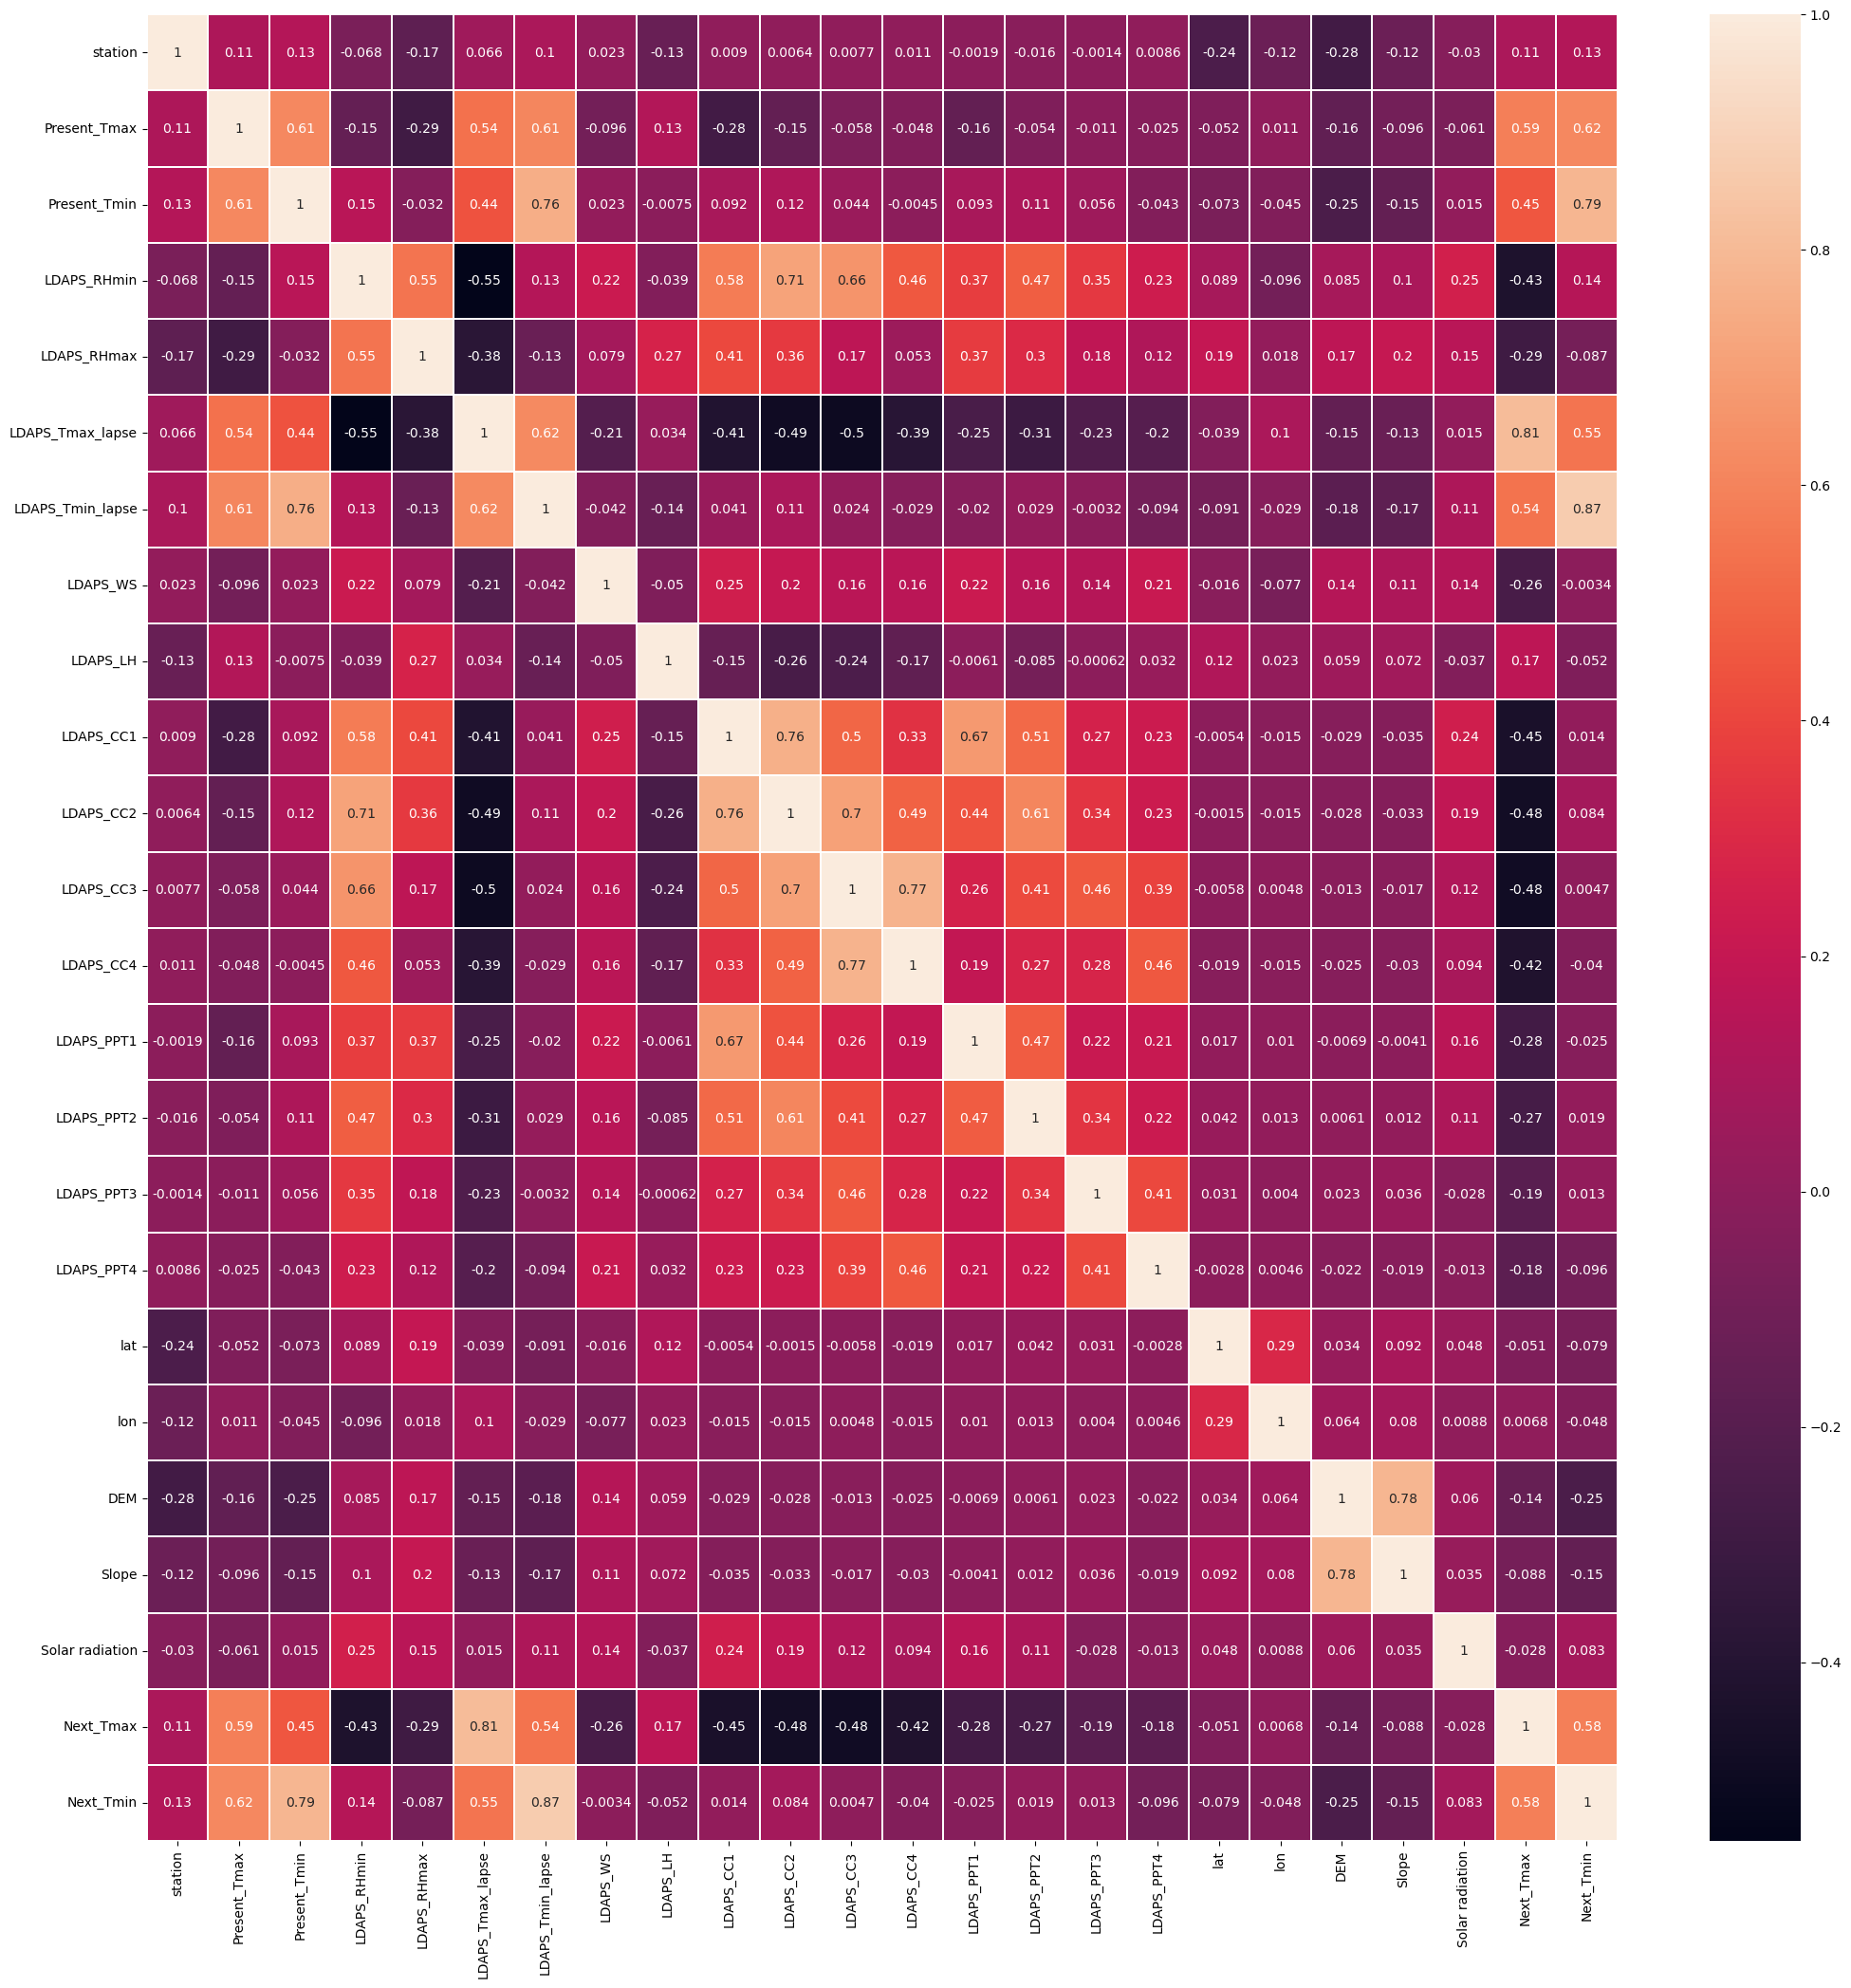

In [178]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,linewidths=0.2)

In [185]:
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.807684
Present_Tmax        0.587399
Next_Tmin           0.584477
LDAPS_Tmin_lapse    0.541077
Present_Tmin        0.449434
LDAPS_LH            0.170772
station             0.107297
lon                 0.006801
Solar radiation    -0.027530
lat                -0.050584
Slope              -0.088496
DEM                -0.144757
LDAPS_PPT4         -0.178168
LDAPS_PPT3         -0.189687
LDAPS_WS           -0.255898
LDAPS_PPT2         -0.271724
LDAPS_PPT1         -0.282938
LDAPS_RHmax        -0.293399
LDAPS_CC4          -0.420370
LDAPS_RHmin        -0.425868
LDAPS_CC1          -0.446501
LDAPS_CC2          -0.476053
LDAPS_CC3          -0.484419
Name: Next_Tmax, dtype: float64

from above correaltion of Next day Tmax we observe that Tmax lapse is highly correlated with target Next Tmax
while latitude longitude are not correlated
while cloudcoverage is negatively correlated to next Tmax
while solar radiation ,slope,Dem are not much correalted to taget variable

In [186]:
corr['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.870138
Present_Tmin        0.786753
Present_Tmax        0.616514
Next_Tmax           0.584477
LDAPS_Tmax_lapse    0.547960
LDAPS_RHmin         0.140011
station             0.129108
LDAPS_CC2           0.084413
Solar radiation     0.082879
LDAPS_PPT2          0.019168
LDAPS_CC1           0.013871
LDAPS_PPT3          0.013002
LDAPS_CC3           0.004672
LDAPS_WS           -0.003402
LDAPS_PPT1         -0.025292
LDAPS_CC4          -0.039778
lon                -0.048483
LDAPS_LH           -0.051975
lat                -0.079145
LDAPS_RHmax        -0.086508
LDAPS_PPT4         -0.096134
Slope              -0.154371
DEM                -0.247095
Name: Next_Tmin, dtype: float64

In [202]:
a=corr['Next_Tmin']

In [203]:
a

station             0.129108
Present_Tmax        0.616514
Present_Tmin        0.786753
LDAPS_RHmin         0.140011
LDAPS_RHmax        -0.086508
LDAPS_Tmax_lapse    0.547960
LDAPS_Tmin_lapse    0.870138
LDAPS_WS           -0.003402
LDAPS_LH           -0.051975
LDAPS_CC1           0.013871
LDAPS_CC2           0.084413
LDAPS_CC3           0.004672
LDAPS_CC4          -0.039778
LDAPS_PPT1         -0.025292
LDAPS_PPT2          0.019168
LDAPS_PPT3          0.013002
LDAPS_PPT4         -0.096134
lat                -0.079145
lon                -0.048483
DEM                -0.247095
Slope              -0.154371
Solar radiation     0.082879
Next_Tmax           0.584477
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

From above correaltion we observe that latitude,longitude,,slope,cloud coverage ,solar raditaion are not much correalted to Next Tmin ..
while Tmin lapse,present Tmin,present Tmax are highly correalted to targe variable ie NextTmin

In [191]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [193]:
df.drop('Date',axis=1,inplace=True)

SEPERATING FAETURES AND LABELS

In [194]:
##CONSIDERING LABEL AS NEXT TMIN
x=df.drop('Next_Tmin',axis=1)
y=df['Next_Tmin']

In [195]:
##CONSIDERING LABEL AS NEXT TMAX
x1=df.drop('Next_Tmax',axis=1)
y1=df['Next_Tmax']

FAETURE SCALING

In [196]:
###FOR NEXT TMIN

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672895     -0.431183     -0.820359     0.196440     0.448567   
1    -1.534023      0.687338     -0.734056    -0.237782     0.376935   
2    -1.395150      0.582476     -0.000481    -0.496688    -0.570415   
3    -1.256277      0.722291      0.042670     0.195288     1.188216   
4    -1.117405      0.512569     -0.604602     0.045601     0.313824   
...        ...           ...           ...          ...          ...   
6870  1.104558     -2.388594     -2.373811    -2.235917    -1.416938   
6871  1.243430     -2.598317     -2.546417    -1.844190    -0.611747   
6872  1.382303     -2.318687     -2.675871    -2.087199    -1.325326   
6873  1.521176     -2.318687     -2.416962    -2.282899    -1.563175   
6874  1.660048     -2.353641     -2.546417    -2.363161    -1.570953   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.662016         -0.284105  0.039079  0.224780  -0.441941  ...   
1            -0.012247          0.177391 -0.631671 -0.302192  -0.475665  ...   
2             0.075751          0.415584 -0.358722 -1.245885  -0.540260  ...   
3            -0.065667         -0.140799 -0.657797  0.112712  -0.512174  ...   
4            -0.281708         -0.068841 -0.604848  1.383581  -0.771781  ...   
...                ...               ...       ...       ...        ...  ...   
6870         -0.757622         -2.395665 -0.084703 -1.575618  -1.165415  ...   
6871         -1.162786         -2.615163 -0.584338  0.606744  -1.111233  ...   
6872         -1.291827         -2.183489 -0.352307  0.303204  -1.256798  ...   
6873         -1.051130         -2.202414 -0.119756 -0.443485  -1.233462  ...   
6874         -0.711239         -2.296930  0.302475 -1.591386  -1.181194  ...   

      LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM     Slope  \
0      -0.401323   -0.359392  1.211762  0.002029  2.492865  1.281795   
1      -0.401323   -0.359392  1.211762  0.517277 -0.190074 -0.468097   
2      -0.401323   -0.359392  0.671902  0.844020 -0.503011 -0.837920   
3      -0.401323   -0.359392  2.019553  0.391607 -0.165941  1.140736   
4      -0.401323   -0.359392  0.134041  1.811682 -0.452599 -0.479169   
...          ...         ...       ...       ...       ...       ...   
6870   -0.401323   -0.359392  0.134041  0.617814 -0.721917 -0.395725   
6871   -0.401323   -0.359392 -0.675749  1.195897 -0.872139 -1.115312   
6872   -0.401323   -0.359392 -0.135889 -1.254674 -1.123628 -1.061551   
6873   -0.401323   -0.359392 -0.405819 -1.028468 -1.051907 -0.919477   
6874   -0.401323   -0.359392 -0.405819 -0.261879 -0.961141 -0.828698   

      Solar radiation  Next_Tmax      year     month  
0            1.549553  -0.497277 -1.423575 -0.486327  
1            1.256001  -0.020778 -1.423575 -0.486327  
2            1.242327   0.183436 -1.423575 -0.486327  
3            1.226672   0.387650 -1.423575 -0.486327  
4            1.232818   0.217472 -1.423575 -0.486327  
...               ...        ...       ...       ...  
6870        -2.101025  -1.007813  1.435636  0.405035  
6871        -2.134804  -0.871670  1.435636  0.405035  
6872        -2.131217  -0.769563  1.435636  0.405035  
6873        -2.142952  -0.667456  1.435636  0.405035  
6874        -2.112140  -0.939741  1.435636  0.405035  

[6875 rows x 25 columns]

In [197]:
#### FOR NEXT TMAX


scaler1=StandardScaler()
x1=pd.DataFrame(scaler1.fit_transform(x),columns=x1.columns)
x1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672895     -0.431183     -0.820359     0.196440     0.448567   
1    -1.534023      0.687338     -0.734056    -0.237782     0.376935   
2    -1.395150      0.582476     -0.000481    -0.496688    -0.570415   
3    -1.256277      0.722291      0.042670     0.195288     1.188216   
4    -1.117405      0.512569     -0.604602     0.045601     0.313824   
...        ...           ...           ...          ...          ...   
6870  1.104558     -2.388594     -2.373811    -2.235917    -1.416938   
6871  1.243430     -2.598317     -2.546417    -1.844190    -0.611747   
6872  1.382303     -2.318687     -2.675871    -2.087199    -1.325326   
6873  1.521176     -2.318687     -2.416962    -2.282899    -1.563175   
6874  1.660048     -2.353641     -2.546417    -2.363161    -1.570953   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.662016         -0.284105  0.039079  0.224780  -0.441941  ...   
1            -0.012247          0.177391 -0.631671 -0.302192  -0.475665  ...   
2             0.075751          0.415584 -0.358722 -1.245885  -0.540260  ...   
3            -0.065667         -0.140799 -0.657797  0.112712  -0.512174  ...   
4            -0.281708         -0.068841 -0.604848  1.383581  -0.771781  ...   
...                ...               ...       ...       ...        ...  ...   
6870         -0.757622         -2.395665 -0.084703 -1.575618  -1.165415  ...   
6871         -1.162786         -2.615163 -0.584338  0.606744  -1.111233  ...   
6872         -1.291827         -2.183489 -0.352307  0.303204  -1.256798  ...   
6873         -1.051130         -2.202414 -0.119756 -0.443485  -1.233462  ...   
6874         -0.711239         -2.296930  0.302475 -1.591386  -1.181194  ...   

      LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM     Slope  \
0      -0.401323   -0.359392  1.211762  0.002029  2.492865  1.281795   
1      -0.401323   -0.359392  1.211762  0.517277 -0.190074 -0.468097   
2      -0.401323   -0.359392  0.671902  0.844020 -0.503011 -0.837920   
3      -0.401323   -0.359392  2.019553  0.391607 -0.165941  1.140736   
4      -0.401323   -0.359392  0.134041  1.811682 -0.452599 -0.479169   
...          ...         ...       ...       ...       ...       ...   
6870   -0.401323   -0.359392  0.134041  0.617814 -0.721917 -0.395725   
6871   -0.401323   -0.359392 -0.675749  1.195897 -0.872139 -1.115312   
6872   -0.401323   -0.359392 -0.135889 -1.254674 -1.123628 -1.061551   
6873   -0.401323   -0.359392 -0.405819 -1.028468 -1.051907 -0.919477   
6874   -0.401323   -0.359392 -0.405819 -0.261879 -0.961141 -0.828698   

      Solar radiation  Next_Tmin      year     month  
0            1.549553  -0.497277 -1.423575 -0.486327  
1            1.256001  -0.020778 -1.423575 -0.486327  
2            1.242327   0.183436 -1.423575 -0.486327  
3            1.226672   0.387650 -1.423575 -0.486327  
4            1.232818   0.217472 -1.423575 -0.486327  
...               ...        ...       ...       ...  
6870        -2.101025  -1.007813  1.435636  0.405035  
6871        -2.134804  -0.871670  1.435636  0.405035  
6872        -2.131217  -0.769563  1.435636  0.405035  
6873        -2.142952  -0.667456  1.435636  0.405035  
6874        -2.112140  -0.939741  1.435636  0.405035  

[6875 rows x 25 columns]

CHECKING VIF VALUES FOR TMIN

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

viff

columns    values
0            station  1.247787
1       Present_Tmax  2.823776
2       Present_Tmin  3.095922
3        LDAPS_RHmin  5.903745
4        LDAPS_RHmax  2.251266
5   LDAPS_Tmax_lapse  8.070914
6   LDAPS_Tmin_lapse  6.941938
7           LDAPS_WS  1.268216
8           LDAPS_LH  1.575882
9          LDAPS_CC1  4.246114
10         LDAPS_CC2  5.157215
11         LDAPS_CC3  5.172402
12         LDAPS_CC4  2.960108
13        LDAPS_PPT1  2.156985
14        LDAPS_PPT2  1.850600
15        LDAPS_PPT3  1.541022
16        LDAPS_PPT4  1.578337
17               lat  1.236172
18               lon  1.184220
19               DEM  3.140945
20             Slope  2.899110
21   Solar radiation  1.354177
22         Next_Tmax  4.015098
23              year  1.143870
24             month  1.128050

In [209]:
###From above vif values and correlation values we have observe that below features are multicollinear to each other ad are also less correalted to target variable,hence dropping them
x.drop(['LDAPS_Tmax_lapse','lat','lon','LDAPS_RHmin','LDAPS_CC2','LDAPS_CC3'],axis=1,inplace=True)

In [208]:
a.sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.870138
Present_Tmin        0.786753
Present_Tmax        0.616514
Next_Tmax           0.584477
LDAPS_Tmax_lapse    0.547960
LDAPS_RHmin         0.140011
station             0.129108
LDAPS_CC2           0.084413
Solar radiation     0.082879
LDAPS_PPT2          0.019168
LDAPS_CC1           0.013871
LDAPS_PPT3          0.013002
LDAPS_CC3           0.004672
LDAPS_WS           -0.003402
LDAPS_PPT1         -0.025292
LDAPS_CC4          -0.039778
lon                -0.048483
LDAPS_LH           -0.051975
lat                -0.079145
LDAPS_RHmax        -0.086508
LDAPS_PPT4         -0.096134
Slope              -0.154371
DEM                -0.247095
Name: Next_Tmin, dtype: float64

In [210]:
##chceking again for VIF values
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

viff

columns    values
0            station  1.171677
1       Present_Tmax  2.602681
2       Present_Tmin  3.064180
3        LDAPS_RHmax  1.757357
4   LDAPS_Tmin_lapse  3.503530
5           LDAPS_WS  1.246443
6           LDAPS_LH  1.449093
7          LDAPS_CC1  2.958154
8          LDAPS_CC4  1.771846
9         LDAPS_PPT1  2.005813
10        LDAPS_PPT2  1.570289
11        LDAPS_PPT3  1.343158
12        LDAPS_PPT4  1.555029
13               DEM  3.066384
14             Slope  2.817993
15   Solar radiation  1.255544
16         Next_Tmax  3.017468
17              year  1.112294
18             month  1.115177

In [213]:
##Also,below columns having less correlation with target variable with highly collinearity with each other
x.drop(['Solar radiation','Slope','LDAPS_CC1'],axis=1,inplace=True)

In [214]:
###VIF VALUES FOR TMAX

viff1=pd.DataFrame()
viff1['columns']=x1.columns
viff1['values']=[vif(x1.values,j) for j in range(len(x1.columns))]

viff1

columns    values
0            station  1.247787
1       Present_Tmax  2.823776
2       Present_Tmin  3.095922
3        LDAPS_RHmin  5.903745
4        LDAPS_RHmax  2.251266
5   LDAPS_Tmax_lapse  8.070914
6   LDAPS_Tmin_lapse  6.941938
7           LDAPS_WS  1.268216
8           LDAPS_LH  1.575882
9          LDAPS_CC1  4.246114
10         LDAPS_CC2  5.157215
11         LDAPS_CC3  5.172402
12         LDAPS_CC4  2.960108
13        LDAPS_PPT1  2.156985
14        LDAPS_PPT2  1.850600
15        LDAPS_PPT3  1.541022
16        LDAPS_PPT4  1.578337
17               lat  1.236172
18               lon  1.184220
19               DEM  3.140945
20             Slope  2.899110
21   Solar radiation  1.354177
22         Next_Tmin  4.015098
23              year  1.143870
24             month  1.128050

In [215]:
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.807684
Present_Tmax        0.587399
Next_Tmin           0.584477
LDAPS_Tmin_lapse    0.541077
Present_Tmin        0.449434
LDAPS_LH            0.170772
station             0.107297
lon                 0.006801
Solar radiation    -0.027530
lat                -0.050584
Slope              -0.088496
DEM                -0.144757
LDAPS_PPT4         -0.178168
LDAPS_PPT3         -0.189687
LDAPS_WS           -0.255898
LDAPS_PPT2         -0.271724
LDAPS_PPT1         -0.282938
LDAPS_RHmax        -0.293399
LDAPS_CC4          -0.420370
LDAPS_RHmin        -0.425868
LDAPS_CC1          -0.446501
LDAPS_CC2          -0.476053
LDAPS_CC3          -0.484419
Name: Next_Tmax, dtype: float64

In [216]:
##Below columns are multicollinear to each other as well as showing less correlation with taget variable,hence dropping them
x1.drop(['LDAPS_Tmin_lapse','LDAPS_CC2','LDAPS_CC3','Slope','lat','lon','DEM','LDAPS_RHmax'],axis=1,inplace=True)

In [217]:
print(x.shape)
print(y.shape)
print(x1.shape)
print(y1.shape)

(6875, 16)
(6875,)
(6875, 17)
(6875,)


In [ ]:
viff1=pd.DataFrame()
viff1['columns']=x1.columns
viff1['values']=[vif(x1.values,j) for j in range(len(x1.columns))]

viff1

# MACHINE LEARNING FOR  NEXT_TMIN

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [224]:
lr=LinearRegression()
svr=SVR()
knr=KNeighborsRegressor()
ls=Lasso()
rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

model=[lr,svr,knr,ls,rd,dtr,rfr]

CHOOSING RANDOM STATE

In [225]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Max accuarcy ',maxacc,'at random state',maxrs)

Max accuarcy  0.8428102278334668 at random state 186


In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=186,test_size=0.30)

    ACCURACY SCORE FOR ALL MODELS
    

In [228]:
for m in model:
    print("For",m,'model')
    m.fit(x_train,y_train)
    ypred=m.predict(x_test)
    print('Absolute Error',mean_absolute_error(y_test,ypred))
    print('squared Error',mean_squared_error(y_test,ypred))
    print('Accuarcy Score',r2_score(y_test,ypred))
    print("--"*60)

For LinearRegression() model
Absolute Error 0.7698593990074563
squared Error 0.9184394930714639
Accuarcy Score 0.8428102278334668
------------------------------------------------------------------------------------------------------------------------
For SVR() model
Absolute Error 0.6161388155895324
squared Error 0.6384666300173013
Accuarcy Score 0.8907272336768463
------------------------------------------------------------------------------------------------------------------------
For KNeighborsRegressor() model
Absolute Error 0.6348521570528356
squared Error 0.6989884634028114
Accuarcy Score 0.8803689974808457
------------------------------------------------------------------------------------------------------------------------
For Lasso() model
Absolute Error 1.2347587149121635
squared Error 2.38706372931204
Accuarcy Score 0.5914570240193726
------------------------------------------------------------------------------------------------------------------------
For Ridge() model
A

From above we conclude that RFR model providing highes accuarcy with least error

CROSS VALIDATION

In [232]:
for c in model:
    print("For",c,'model')
    score=cross_val_score(c,x,y,cv=5)
    
    print(score.mean())
    print('Difference',(r2_score(y_test,ypred)-score.mean()))
   
    print("--"*60)

For LinearRegression() model
0.7787606132753302
Difference 0.1200348203916598
------------------------------------------------------------------------------------------------------------------------
For SVR() model
0.6900199556094735
Difference 0.2087754780575165
------------------------------------------------------------------------------------------------------------------------
For KNeighborsRegressor() model
0.6063510175009375
Difference 0.29244441616605255
------------------------------------------------------------------------------------------------------------------------
For Lasso() model
0.5273812270058726
Difference 0.37141420666111735
------------------------------------------------------------------------------------------------------------------------
For Ridge() model
0.7787673528285157
Difference 0.12002808083847427
------------------------------------------------------------------------------------------------------------------------
For DecisionTreeRegressor() model


From above validation score Ridge Regression model provides highest accracy with least error

CHOOSING RIDGE REGRESSION PROBLEM AS FINAL MODEL 

HYPERPARAMETER TUNING FOR MODEL

In [235]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100] }

gcv=GridSearchCV(rd,parameters)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 10}

AGAIN MODELLING USING HYPERPARAMETERS

In [238]:
rdmodel=Ridge(alpha= 10)
rdmodel.fit(x_train,y_train)
ypred=rdmodel.predict(x_test)
acc=r2_score(y_test,ypred)
print('Accuracy',acc)
print('MAE',mean_absolute_error(y_test,ypred))

Accuracy 0.8427690856225205
MAE 0.7699401374072936


SAVING THE BEST MODEL

In [239]:
import joblib
joblib.dump(rdmodel,'Next Tmin.pkl')

['Next Tmin.pkl']

In [251]:
model=joblib.load('Next Tmin.pkl')
model

Ridge(alpha=10)

In [252]:
df2=pd.DataFrame()
df2['Actual vakues']=np.array(y_test)
df2['Predicted values']=model.predict(x_test)
df2

Actual vakues  Predicted values
0              24.7         23.673866
1              24.1         23.862393
2              27.1         26.355572
3              22.6         21.974092
4              24.1         24.046836
...             ...               ...
2058           24.6         23.770815
2059           27.9         27.958362
2060           20.0         21.154456
2061           23.6         23.653191
2062           24.8         24.323894

[2063 rows x 2 columns]

HENCE WE HAVE OBTAINED MAX ACCURACY OF 85% FOR NEXT TMIN PREDICTION

# MACHINE LEARNING FOR NEXT TMAX

In [241]:
maxacc1=0
maxrs1=0
for i in range(200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=i,test_size=0.30)
    lr.fit(x1_train,y1_train)
    ypred1=lr.predict(x1_test)
    acc=r2_score(y1_test,ypred1)
    if acc>maxacc1:
        maxacc1=acc
        maxrs1=i
print('Max accuarcy ',maxacc1,'at random state',maxrs1)

Max accuarcy  1.0 at random state 0


In [242]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0,test_size=0.30)

    ACCURACY SCORE FOR ALL MODELS
    

In [243]:
for t in model:
    print("For",t,'model')
    m.fit(x1_train,y1_train)
    ypred1=m.predict(x1_test)
    print('Absolute Error',mean_absolute_error(y1_test,ypred1))
    print('squared Error',mean_squared_error(y1_test,ypred1))
    print('Accuarcy Score',r2_score(y1_test,ypred1))
    print("--"*60)

For LinearRegression() model
Absolute Error 0.0009927290354214524
squared Error 0.00019158410082402506
Accuarcy Score 0.9999776395448454
------------------------------------------------------------------------------------------------------------------------
For SVR() model
Absolute Error 0.0007988366456975791
squared Error 0.00013040523509450948
Accuarcy Score 0.9999847799457329
------------------------------------------------------------------------------------------------------------------------
For KNeighborsRegressor() model
Absolute Error 0.0008313136209769247
squared Error 0.00016661609306833417
Accuarcy Score 0.9999805536489664
------------------------------------------------------------------------------------------------------------------------
For Lasso() model
Absolute Error 0.0009195346583012039
squared Error 0.0001529883664566085
Accuarcy Score 0.9999821441889353
---------------------------------------------------------------------------------------------------------------

From above we conclude that every model providing highest accuarcy with least error

CROSS VALIDATION

In [244]:
for c in model:
    print("For",c,'model')
    score=cross_val_score(c,x1,y1,cv=5)
    
    print(score.mean())
    print('Difference',(r2_score(y1_test,ypred1)-score.mean()))
   
    print("--"*60)

For LinearRegression() model
1.0
Difference -2.046475147399196e-05
------------------------------------------------------------------------------------------------------------------------
For SVR() model
0.9549926332585412
Difference 0.044986901989984784
------------------------------------------------------------------------------------------------------------------------
For KNeighborsRegressor() model
0.7133502039182119
Difference 0.2866293313303141
------------------------------------------------------------------------------------------------------------------------
For Lasso() model
0.8687801694789158
Difference 0.13119936576961022
------------------------------------------------------------------------------------------------------------------------
For Ridge() model
0.9999998072442089
Difference -2.0271995682885624e-05
------------------------------------------------------------------------------------------------------------------------
For DecisionTreeRegressor() model
0.9998

CHOOSING SVR MODEL AS FINAL MODEL FOR PREDICTION OF NEXT TMAX

HYPER PARAMETER TUNING

In [246]:
parameters={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'] }

gcv1=GridSearchCV(svr,parameters)
gcv1.fit(x1_train,y1_train)
gcv1.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [250]:
svrmodel=SVR(C= 1000, gamma= 0.0001, kernel= 'rbf')
svrmodel.fit(x1_train,y1_train)
ypred=svrmodel.predict(x1_test)
acc=r2_score(y1_test,ypred1)
print('Accuracy',acc)
print('MAE',mean_absolute_error(y1_test,ypred1))

Accuracy 0.999979535248526
MAE 0.0009684924867062748


SAVING THE BEST MODEL

In [253]:
import joblib
joblib.dump(svrmodel,'Next Tmax.pkl')

['Next Tmax.pkl']

In [254]:
model1=joblib.load('Next Tmax.pkl')
model1

SVR(C=1000, gamma=0.0001)

In [256]:
df3=pd.DataFrame()
df3['Actual vakues']=np.array(y1_test)
df3['Predicted values']=model1.predict(x1_test)
df3

Actual vakues  Predicted values
0              29.6         29.579440
1              24.7         24.735147
2              27.0         26.984370
3              33.6         33.600725
4              33.8         33.813972
...             ...               ...
2058           33.9         33.875365
2059           31.2         31.201942
2060           27.4         27.390030
2061           31.2         31.153362
2062           33.1         33.087190

[2063 rows x 2 columns]

HENCE WE HAVE OBTAINED ACCURACY OF 99% FOR NEXT TMAX TEMPERATURE